In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the Dataset

Open the dataset and take a look at a preview of it - First few rows and basic statistics 

In [86]:
framingham = pd.read_csv("framingham.csv")

In [87]:
framingham.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [88]:
framingham.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## Data Preparation

1) Perform a check for missing values and fill the missing values using mean, median, mode or any other advanced method.

2) Change the datatypes of variables if necessary

3) Dummify categorical variables if necessary

D:\Anaconda\lib\site-packages\missingno\missingno.py:232: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax1.set_axis_bgcolor((1, 1, 1))


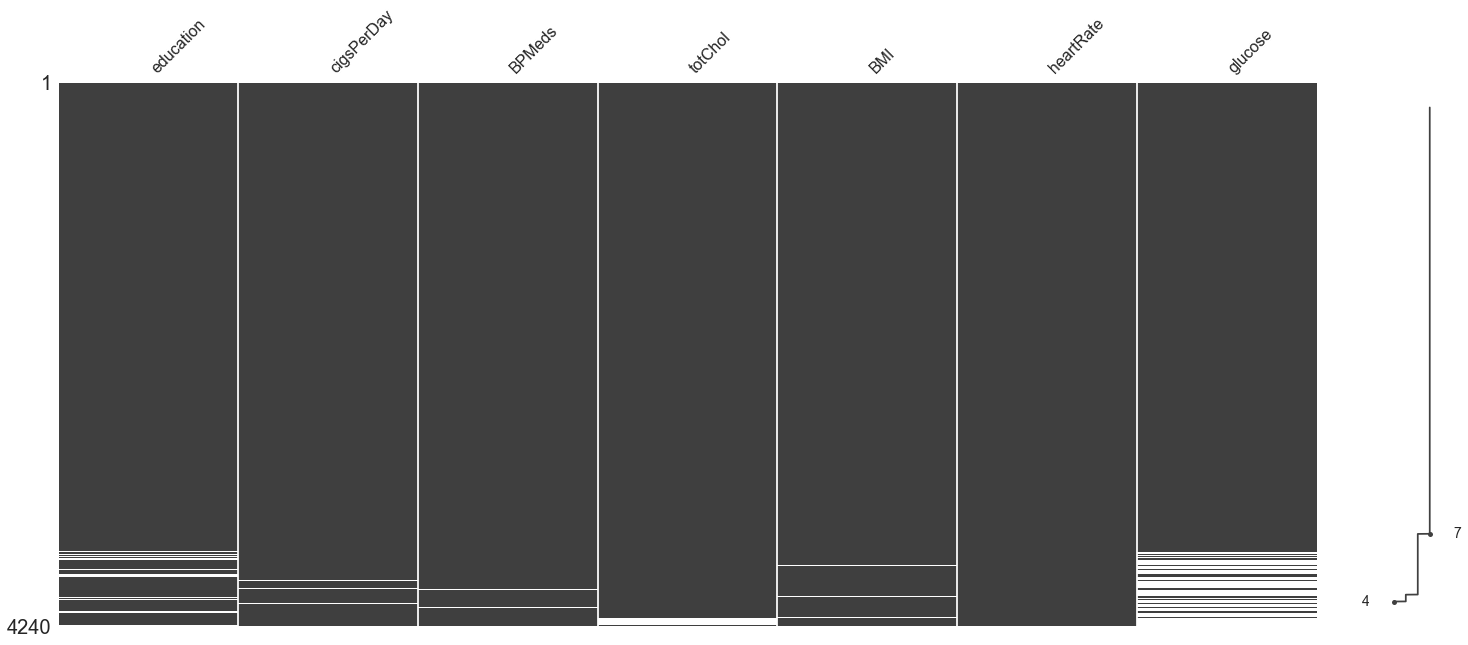

In [89]:
import missingno as msno
msno.matrix( framingham[framingham.columns[pd.isnull(framingham).any()].tolist()] , p = 10, sort = "descending" )

In [94]:
framingham['education'].fillna(1, inplace=True)
framingham['cigsPerDay'].fillna(framingham['cigsPerDay'].median(), inplace=True)
framingham['BPMeds'].fillna(framingham['BPMeds'].median(), inplace=True)
framingham['totChol'].fillna(framingham['totChol'].median(), inplace=True)
framingham['BMI'].fillna(framingham['BMI'].median(), inplace=True)
framingham['heartRate'].fillna(framingham['heartRate'].median(), inplace=True)
framingham['glucose'].fillna(framingham['glucose'].median(), inplace=True)

In [97]:
framingham.dtypes

male                 int64
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
edu_1.0              uint8
edu_2.0              uint8
edu_3.0              uint8
edu_4.0              uint8
dtype: object

In [95]:
edu_dummies = pd.get_dummies(framingham['education'],prefix="edu")
edu_dummies.head()

,edu_1.0,edu_2.0,edu_3.0,edu_4.0
0,0,0,0,1
1,0,1,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0


In [96]:
framingham = pd.concat([framingham, edu_dummies], axis=1)
framingham.drop("education", axis = 1, inplace=True)

## Basic Desciptive Analysis

In [90]:
framingham.education.value_counts()

1.0    1720
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

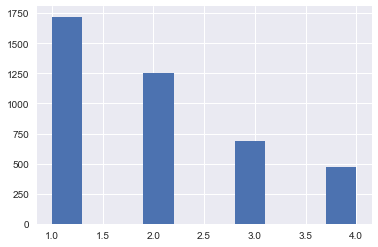

In [91]:
framingham.education.hist()

In [93]:
pd.isnull(framingham).any()

male               False
age                False
education          False
currentSmoker      False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
TenYearCHD         False
dtype: bool

In [82]:
framingham[framingham.cigsPerDay > 50]

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,edu_1.0,edu_2.0,edu_3.0,edu_4.0
327,1,56,1,60.0,0.0,0,0,0,246.0,125.0,79.0,29.64,70.0,85.0,0,1,0,0,0
721,1,59,1,60.0,0.0,0,1,0,298.0,153.5,105.0,25.05,70.0,84.0,0,1,0,0,0
1054,1,58,1,60.0,0.0,0,1,0,250.0,150.0,97.0,32.00,75.0,65.0,0,0,1,0,0
1452,1,39,1,60.0,0.0,0,0,0,215.0,112.0,65.0,23.60,59.0,78.0,0,1,0,0,0
1468,1,50,1,60.0,0.0,0,1,0,340.0,134.0,95.0,30.46,85.0,86.0,0,1,0,0,0
1488,1,37,1,60.0,0.0,0,0,0,254.0,122.5,82.5,23.87,88.0,83.0,0,0,0,0,1
1849,1,48,1,60.0,0.0,0,0,0,252.0,104.0,73.5,23.03,70.0,77.0,0,1,0,0,0
2709,1,46,1,60.0,0.0,0,0,0,285.0,121.0,82.0,27.62,70.0,79.0,0,1,0,0,0
2710,1,49,1,60.0,0.0,0,0,0,213.0,123.0,75.0,24.84,70.0,78.0,1,0,1,0,0
3008,1,40,1,70.0,0.0,0,1,0,210.0,132.0,86.0,31.57,98.0,80.0,0,0,0,1,0


In [66]:
framingham.TenYearCHD.value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

In [67]:
framingham[["cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]].corr()

,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
cigsPerDay,1.000000,-0.027134,-0.088393,-0.056768,-0.092647,0.074258,-0.056792
totChol,-0.027134,1.000000,0.207350,0.163408,0.115035,0.090541,0.045677
sysBP,-0.088393,0.207350,1.000000,0.783952,0.325087,0.182052,0.135091
diaBP,-0.056768,0.163408,0.783952,1.000000,0.376396,0.181023,0.058899
BMI,-0.092647,0.115035,0.325087,0.376396,1.000000,0.067293,0.082228
heartRate,0.074258,0.090541,0.182052,0.181023,0.067293,1.000000,0.087362
glucose,-0.056792,0.045677,0.135091,0.058899,0.082228,0.087362,1.000000


In [71]:
framingham.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Modeling 

In [73]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,confusion_matrix,classification_report

In [74]:
framingham.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'edu_1.0',
       'edu_2.0', 'edu_3.0', 'edu_4.0'],
      dtype='object')

In [75]:
from sklearn.model_selection import train_test_split
featureCols = ['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'edu_1.0',
       'edu_2.0', 'edu_3.0', 'edu_4.0']
train_X, test_X,train_y, test_y = train_test_split( framingham[featureCols],\
                                    framingham['TenYearCHD'],\
                                    test_size = 0.3,\
                                    random_state = 42 )

In [77]:
# Initialize logistic regression model
log_model = linear_model.LogisticRegression()

# Train the model
log_model.fit(X = train_X,y = train_y)

# Make predictions
preds = log_model.predict(X= test_X)

# Check trained model intercept
print (log_model.intercept_)

# Check trained model coefficients
print (log_model.coef_)

[-4.39921986]
[[  2.38577124e-01   5.49496422e-02  -1.71778922e-01   2.65839555e-02
    1.76057925e-01   1.03678284e+00   4.51700843e-01   1.28150147e-01
   -9.40407553e-04   1.21695290e-02  -4.01082830e-03  -9.93665270e-03
   -1.05683810e-02   5.58495899e-03  -1.05799148e+00  -1.20774160e+00
   -1.14514872e+00  -9.88338049e-01]]


In [109]:
dict(list(zip(featureCols, list(log_model.coef_[0]))))

{'BMI': -0.0099366526989309156,
 'BPMeds': 0.17605792546971855,
 'age': 0.054949642188039383,
 'cigsPerDay': 0.026583955496684044,
 'currentSmoker': -0.17177892176361761,
 'diaBP': -0.0040108282978045104,
 'diabetes': 0.12815014670411698,
 'edu_1.0': -1.0579914809753153,
 'edu_2.0': -1.2077416040890394,
 'edu_3.0': -1.1451487244768053,
 'edu_4.0': -0.98833804900371014,
 'glucose': 0.0055849589860248582,
 'heartRate': -0.010568380981974592,
 'male': 0.2385771243859871,
 'prevalentHyp': 0.4517008434870341,
 'prevalentStroke': 1.0367828364410865,
 'sysBP': 0.012169529009990481,
 'totChol': -0.00094040755331694888}

In [110]:
accuracy = metrics.accuracy_score( list(test_y), preds )
report = metrics.classification_report( list(test_y), preds )
print ("Accuracy Of the Logit model: ",accuracy)
print ("\nReport Of the Logit model: \n",report)

Accuracy Of the Logit model:  0.854559748428

Report Of the Logit model: 
              precision    recall  f1-score   support

          0       0.86      0.99      0.92      1077
          1       0.71      0.09      0.16       195

avg / total       0.83      0.85      0.80      1272



In [79]:
proby = log_model.predict_proba(test_X)

In [80]:
proby

array([[ 0.9136168 ,  0.0863832 ],
       [ 0.86724563,  0.13275437],
       [ 0.87375478,  0.12624522],
       ..., 
       [ 0.72531405,  0.27468595],
       [ 0.93684575,  0.06315425],
       [ 0.89207569,  0.10792431]])